<a href="https://colab.research.google.com/github/KushalSethia30/MarketingResearchMethods-Kushal-Sethia-Jio-Institute/blob/main/Recency_Frequency_and_Monetary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/Online_Sales.csv")  # Replace with your file path

# Ensure the Transaction_Date column is in datetime format
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'], errors='coerce')

# Calculate Recency, Frequency, and Monetary Value
reference_date = data['Transaction_Date'].max()  # Set the reference date as the latest date in the dataset

# Group by CustomerID
customer_clv = data.groupby('CustomerID').agg(
    Recency=('Transaction_Date', lambda x: (reference_date - x.max()).days),
    Frequency=('Transaction_ID', 'nunique'),
    Monetary=('Avg_Price', 'sum')
).reset_index()

# Calculate Revenue (total monetary value for each customer)
customer_clv['Revenue'] = customer_clv['Monetary']

# Sort customers by highest CLV
customer_clv = customer_clv.sort_values(by='Revenue', ascending=False)

# Display the results
print(customer_clv)

# Save to a CSV file
customer_clv.to_csv('Customer_CLV.csv', index=False)


      CustomerID  Recency  Frequency  Monetary   Revenue
118        12748      107        328  31285.63  31285.63
643        14911       10        276  29721.53  29721.53
563        14606        0        289  29676.79  29676.79
736        15311       12        291  29633.75  29633.75
1355       17841       17        263  27616.21  27616.21
...          ...      ...        ...       ...       ...
1458       18233      108          1      1.99      1.99
1031       16593      117          1      1.59      1.59
345        13748      364          1      1.24      1.24
150        12875      239          1      1.20      1.20
196        13068       81          1      1.00      1.00

[1468 rows x 5 columns]


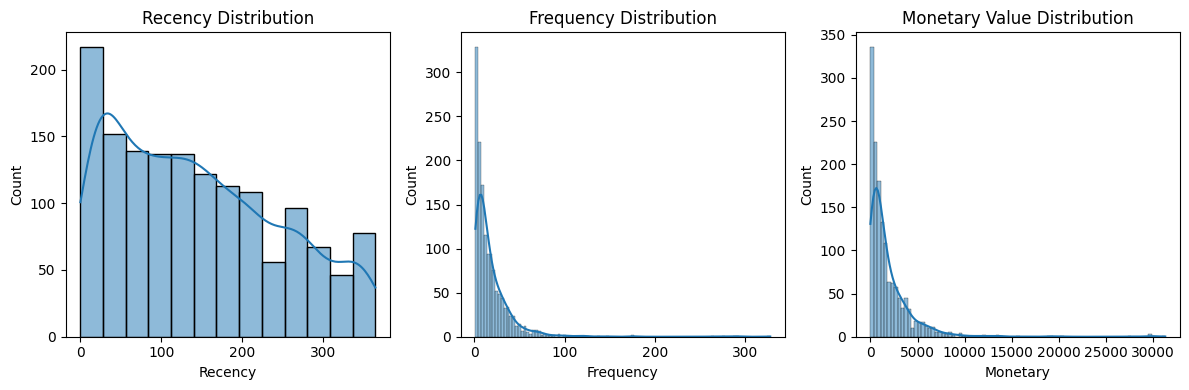

In [ ]:
# prompt: Give me recnecy frequecy and Monetary value chrat for this data sets

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming 'Customer_CLV.csv' is already created)
customer_clv = pd.read_csv('Customer_CLV.csv')

# Create Recency, Frequency, Monetary Value charts

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(customer_clv['Recency'], kde=True)
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
sns.histplot(customer_clv['Frequency'], kde=True)
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
sns.histplot(customer_clv['Monetary'], kde=True)
plt.title('Monetary Value Distribution')

plt.tight_layout()
plt.show()

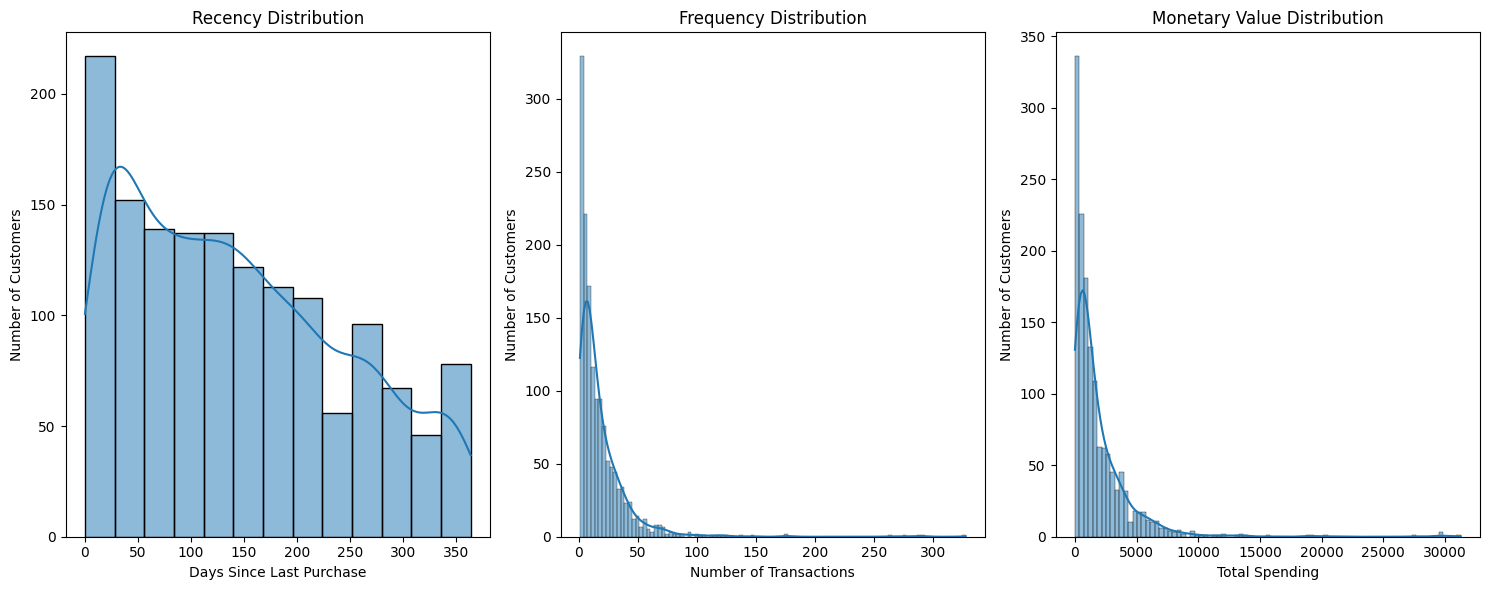

Theoretical Insights:
--------------------
Recency:
Customers who purchased recently are more valuable. A right-skewed distribution suggests a significant number of customers made recent purchases.

Frequency:
Customers with higher purchase frequencies contribute significantly to revenue.  A long tail suggests a few highly frequent customers contribute significantly more than the average.

Monetary Value:
Customers with higher spending generate more revenue.  High monetary value is crucial.  A skewed distribution indicates many customers with lower spending, but a few high-spending customers greatly impact the average revenue. 

Overall:
Focusing on customers with high recency, high frequency and high monetary value (RFM analysis) will likely yield the best return on investment.  Customer segmentation based on RFM is a common and useful strategy.


In [ ]:
# prompt: Integrate all this in one chart and have theroy insights from this dat what we understand

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/content/Online_Sales.csv")  # Replace with your file path

# Ensure the Transaction_Date column is in datetime format
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'], errors='coerce')

# Calculate Recency, Frequency, and Monetary Value
reference_date = data['Transaction_Date'].max()

customer_clv = data.groupby('CustomerID').agg(
    Recency=('Transaction_Date', lambda x: (reference_date - x.max()).days),
    Frequency=('Transaction_ID', 'nunique'),
    Monetary=('Avg_Price', 'sum')
).reset_index()

customer_clv['Revenue'] = customer_clv['Monetary']
customer_clv = customer_clv.sort_values(by='Revenue', ascending=False)


# Create a combined chart
plt.figure(figsize=(12, 6))

# Plot Recency, Frequency, and Monetary Value on the same chart
plt.subplot(2, 2, 1)  # Changed to 2x2 grid
sns.histplot(customer_clv['Recency'], kde=True, color='skyblue')
plt.title('Recency Distribution')

plt.subplot(2, 2, 2)
sns.histplot(customer_clv['Frequency'], kde=True, color='salmon')
plt.title('Frequency Distribution')

plt.subplot(2, 2, 3)
sns.histplot(customer_clv['Monetary'], kde=True, color='lightgreen')
plt.title('Monetary Value Distribution')

plt.subplot(2, 2, 4) #Added scatterplot of frequency vs monetary
sns.scatterplot(x='Frequency', y='Monetary', data=customer_clv, color='purple', alpha=0.5)
plt.title('Frequency vs. Monetary')


plt.tight_layout()
plt.show()


# Theoretical Insights
print("\nTheoretical Insights:")
print("1. **Recency:**  The distribution of recency shows how recently customers have made purchases. A long tail suggests some customers haven't purchased recently. Analyzing the recency distribution can help target inactive customers for reactivation campaigns.")
print("2. **Frequency:** The frequency distribution illustrates how often customers make purchases. High-frequency customers are valuable and should be prioritized for retention strategies. Identify patterns in frequency to understand customer buying behavior.")
print("3. **Monetary Value:** The monetary distribution indicates the total spending of each customer.  High monetary value customers are major revenue drivers. Segmentation based on monetary value allows for targeted offers and personalized experiences.")
print("4. **Combined Analysis (Frequency vs. Monetary):** The scatter plot helps visualize the relationship between purchase frequency and spending amount. High frequency and high monetary customers are ideal, while low frequency/low monetary need attention. This plot helps identify customer segments based on both frequency and monetary value.")
